<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-data" data-toc-modified-id="load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load data</a></span></li><li><span><a href="#detect-local-mode" data-toc-modified-id="detect-local-mode-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>detect local mode</a></span><ul class="toc-item"><li><span><a href="#KDE" data-toc-modified-id="KDE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KDE</a></span></li><li><span><a href="#noise-detecting" data-toc-modified-id="noise-detecting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>noise detecting</a></span></li></ul></li><li><span><a href="#topological-graph" data-toc-modified-id="topological-graph-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>topological graph</a></span></li><li><span><a href="#prune-graph" data-toc-modified-id="prune-graph-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>prune graph</a></span></li><li><span><a href="#circles" data-toc-modified-id="circles-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>circles</a></span></li><li><span><a href="#impossible" data-toc-modified-id="impossible-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>impossible</a></span></li><li><span><a href="#s-set1" data-toc-modified-id="s-set1-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>s-set1</a></span></li><li><span><a href="#smile" data-toc-modified-id="smile-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>smile</a></span></li><li><span><a href="#moons" data-toc-modified-id="moons-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>moons</a></span></li><li><span><a href="#其他方法" data-toc-modified-id="其他方法-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>其他方法</a></span><ul class="toc-item"><li><span><a href="#谱聚类" data-toc-modified-id="谱聚类-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>谱聚类</a></span></li><li><span><a href="#meanshift" data-toc-modified-id="meanshift-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>meanshift</a></span></li><li><span><a href="#k-means" data-toc-modified-id="k-means-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>k-means</a></span></li><li><span><a href="#AgglomerativeClustering" data-toc-modified-id="AgglomerativeClustering-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>AgglomerativeClustering</a></span></li><li><span><a href="#AffinityPropagation" data-toc-modified-id="AffinityPropagation-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>AffinityPropagation</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#OPTICS" data-toc-modified-id="OPTICS-10.7"><span class="toc-item-num">10.7&nbsp;&nbsp;</span>OPTICS</a></span></li></ul></li></ul></div>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx

# load data

/usr/data/gzy/software/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



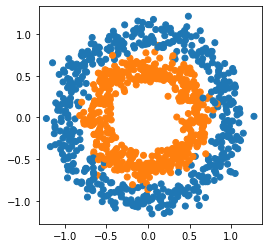

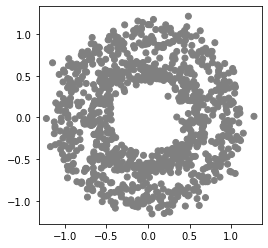

In [9]:
panda=pd.read_csv('./artificial_csv/circles_0.1_noise.csv', header=None)
X=panda.values[:,:2]
Y=panda.values[:,2]
Y[Y=='noise']=-1
Y=Y.astype(np.int)
plot_tools.autoPlot(X[:,:2],Y)
plot_tools.autoPlot(X[:,:2],-np.ones_like(Y))

# detect local mode

## KDE

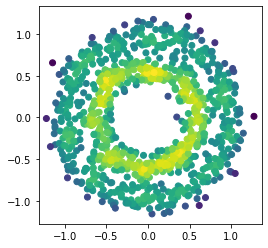

In [22]:
import detect_local_mode
imp.reload(detect_local_mode)

K_d=30
level=0.4
search_n=13

extend=np.zeros((X.shape[0],2))
extend[:,1]=range(0,X.shape[0])
X_extend=np.hstack([X,extend])

Dis,manifolds,connection,noise,P2M,draw_tasks=detect_local_mode.Manifold.get_manifolds(X_extend,K_d,level,search_n)
noise_manifold=manifolds[0]
real_manifolds=manifolds[1:]

plot_tools.autoPlot(X_extend[:,:2],X_extend[:,-2],continues=True)

## noise detecting

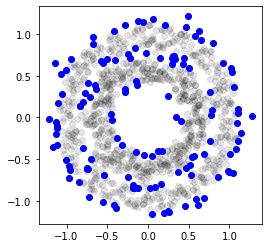

In [23]:
plt.figure(figsize=(4,4))
plt.scatter(X_extend[:,0],X_extend[:,1],color=(0, 0, 0, 0.1))
plt.scatter(noise_manifold.points[:,0],noise_manifold.points[:,1],color=(0, 0, 1, 1))

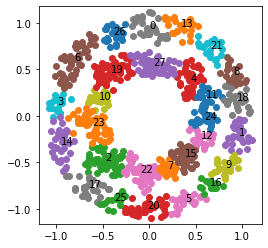

In [41]:
plot_tools.PaperGraph.show_manifolds(real_manifolds,seed=2018)

# topological graph

In [42]:
import topo_graph
imp.reload(topo_graph)
BoundaryMat_E=topo_graph.TopoGraph.get_boundary(connection,real_manifolds)
ConnectMat=topo_graph.TopoGraph.connectivity_all(real_manifolds,K_d,Dis,BoundaryMat_E,X_extend)

Connectivity is 12.9720479015223


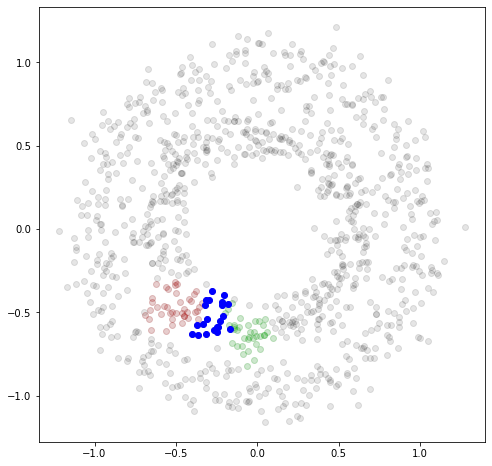

In [43]:
i,j=2,22

plt.figure(figsize=(8,8))
plt.scatter(X_extend[:,0],X_extend[:,1],color=(0, 0, 0, 0.1))

plt.scatter(real_manifolds[i].points[:,0],real_manifolds[i].points[:,1],color=(1, 0, 0, 0.1))
plt.scatter(real_manifolds[j].points[:,0],real_manifolds[j].points[:,1],color=(0, 1, 0, 0.1))

B_ij=list(set(BoundaryMat_E[i,j].astype(np.int).reshape(-1).tolist()))
plt.scatter(X_extend[B_ij,0],X_extend[B_ij,1],color=(0, 0, 1, 1))

print('Connectivity is {}'.format(ConnectMat[i,j]))

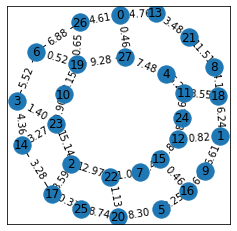

In [44]:
plot_tools.PaperGraph.show_topo_graph(ConnectMat,real_manifolds)

# prune graph

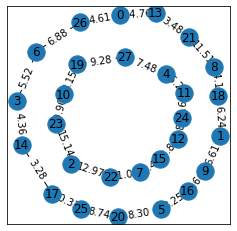

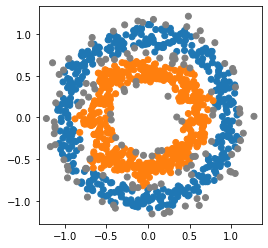

In [45]:
new_ConnectMat=topo_graph.TopoGraph.cut_graph(ConnectMat,0.25)
plot_tools.PaperGraph.show_topo_graph(new_ConnectMat,real_manifolds)

tmp_G=nx.from_numpy_matrix(new_ConnectMat)
Sets=list(nx.connected_components(tmp_G))

X2=[]
Y2=[]
for c in range(len(Sets)):
    for idx in list(Sets[c]):
        X2.append(real_manifolds[idx].points[:,:-2])
        Y2.append(np.ones([real_manifolds[idx].points.shape[0],1])*c)
X2.append(noise_manifold.points[:,:-2])
Y2.append(-np.ones([noise_manifold.points.shape[0],1]))
X2=np.vstack(X2)
Y2=np.vstack(Y2).astype(np.int)

plot_tools.autoPlot(X2,Y2)

# circles

In [2]:
panda=pd.read_csv('./artificial_csv/circles_0.1_noise.csv', header=None)
X=panda.values[:,:2]

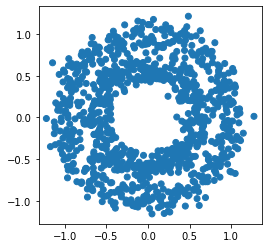

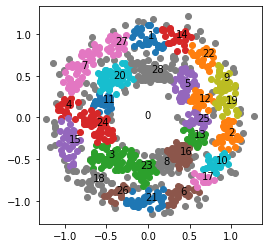

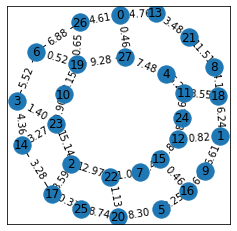

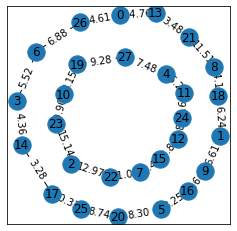

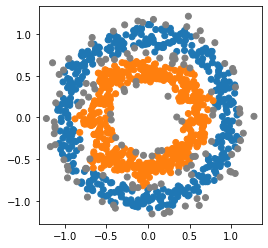

In [21]:
import api
imp.reload(api)

X2,Y2,P,W2=api.DGSFC.fit(  X,
                              K_d=30,
                              search_n=13,
                              ratio=0.25,
                              level=0.4,
                              plot=True,
                              pnum=30,
                              mp4=False,
                              fps=4,
                              figroot='/usr/data/gzy/DGC/results/circles',
                              mp4name='circles'
                             )

# impossible

../utils/topo_graph.py:53: RuntimeWarning:

invalid value encountered in true_divide



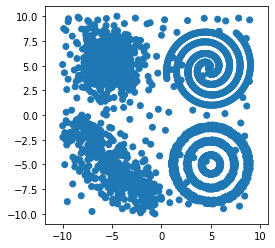

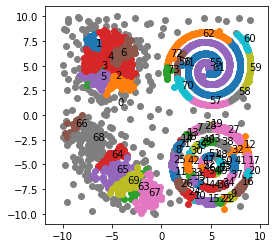

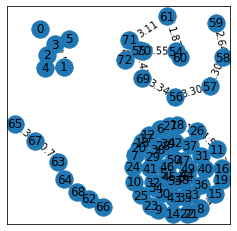

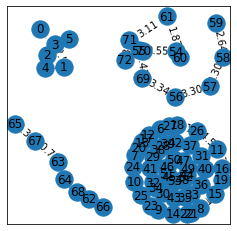

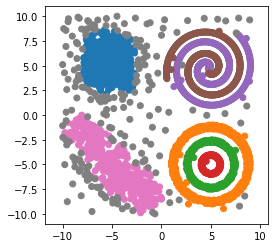

In [16]:
import api
imp.reload(api)

panda=pd.read_csv('./artificial_csv/impossible.csv', header=None)
X=panda.values[:,:2]

X2,Y2,P,W2=api.DGSFC.fit(  X,
                              K_d=30,
                              search_n=9,
                              ratio=0.2,
                              level=0.5,
                              plot=True,
                              pnum=30,
                              mp4=False,
                              fps=4,
                              figroot='/usr/data/gzy/DGC/results/impossible',
                              mp4name='impossible'
                             )

# s-set1

../utils/topo_graph.py:53: RuntimeWarning:

invalid value encountered in true_divide



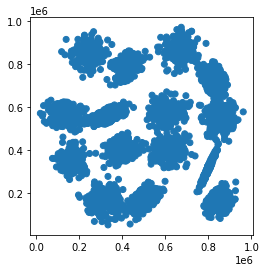

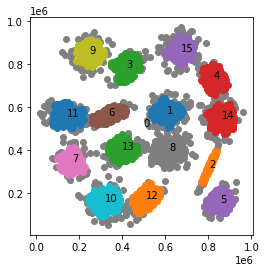

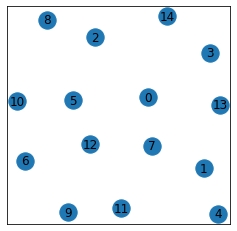

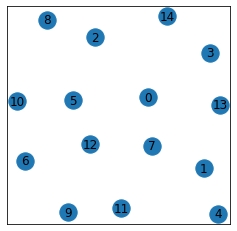

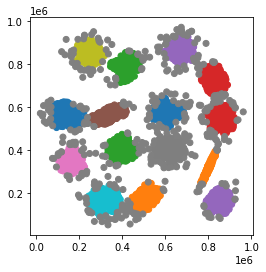

In [15]:
import api
imp.reload(api)

panda=pd.read_csv('./artificial_csv/s-set1.csv', header=None)
X=panda.values[:,:2]

X,Y_pred,P,W2=api.DGSFC.fit(  X,
                              K_d=40,
                              search_n=15,
                              ratio=0.1,
                              level=0.45,
                              plot=True,
                              pnum=30,
                              mp4=False,
                              fps=4,
                              figroot='/usr/data/gzy/DGC/results/s-set1',
                              mp4name='s-set1'
                             )

# smile

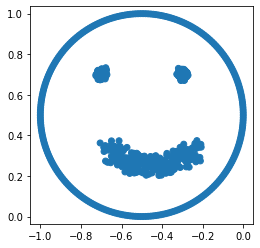

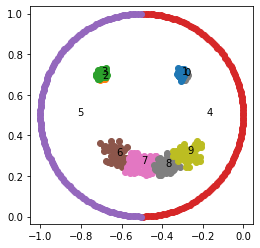

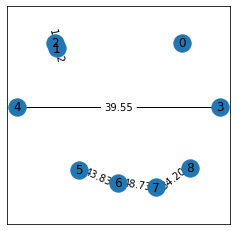

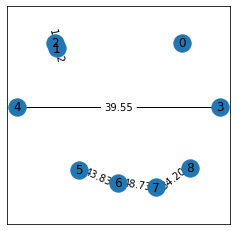

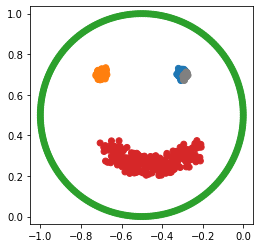

In [22]:
import api
imp.reload(api)

panda=pd.read_csv('./artificial_csv/smile1.csv', header=None)
X=panda.values[:,:2]

X2,Y2,P,W2=api.DGSFC.fit(  X,
                              K_d=40,
                              search_n=20,
                              ratio=0,
                              level=1,
                              plot=True,
                              pnum=30,
                              mp4=False,
                              fps=4,
                              figroot='/usr/data/gzy/DGC/results/smile1',
                              mp4name='smile1'
                             )

# moons

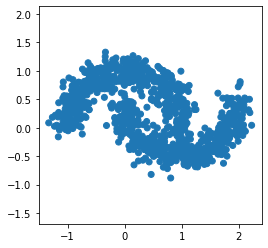

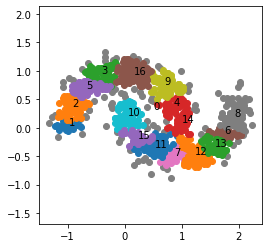

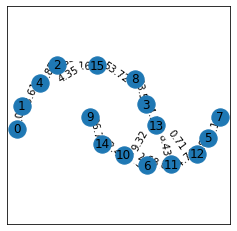

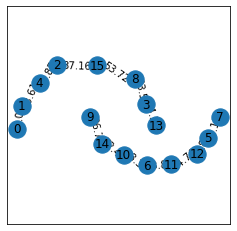

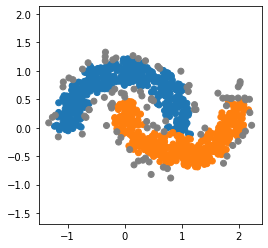

In [19]:
import api
imp.reload(api)

panda=pd.read_csv('./artificial_csv/moons_0.15_noise.csv', header=None)
X=panda.values[:,:2]

X2,Y2,P,W2=api.DGSFC.fit( X,
                          K_d=30,
                          search_n=20,
                          ratio=0.5,
                          level=0.5,
                          plot=True,
                          pnum=30,
                          mp4=False,
                          fps=4,
                          figroot='/usr/data/gzy/DGC/results/moons',
                          mp4name='moons'
                         )

# 其他方法

https://scikit-learn.org/stable/modules/clustering.html

## 谱聚类

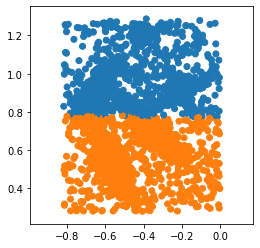

In [198]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X[:,:2])
plot_tools.autoPlot(X[:,:2],clustering.labels_)

## meanshift

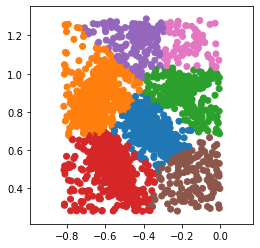

In [204]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X[:,:2], quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X[:,:2])
plot_tools.autoPlot(X[:,:2],ms.labels_)

## k-means

In [1119]:
from sklearn.cluster import MiniBatchKMeans, KMeans
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means.fit(X)
autoPlotly(X,k_means.labels_)

## AgglomerativeClustering

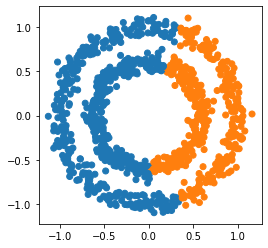

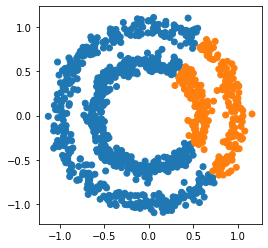

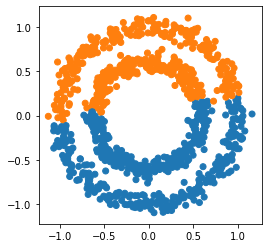

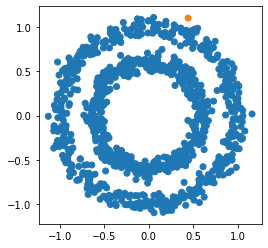

In [1120]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='complete').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='average').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='single').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

## AffinityPropagation

/opt/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.



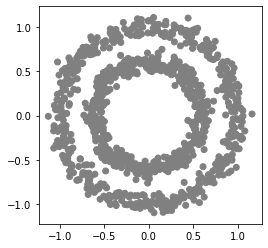

In [1121]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(X)
autoPlot(X,clustering.labels_)

## DBSCAN

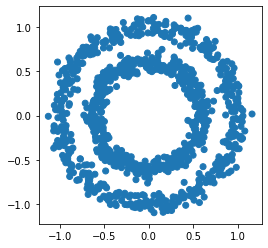

In [1124]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=10).fit(X)
autoPlot(X,clustering.labels_)

## OPTICS

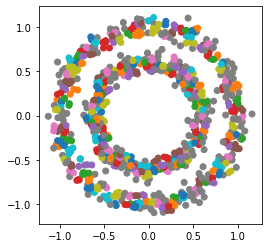

In [1125]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2).fit(X)
autoPlot(X,clustering.labels_)